# POSTTEST 5

Buatlah model deep learning dengan ketentuan sebagai berikut:
Instruksi:
1. Dataset tidak boleh sama antar praktikan
2. Minimal akurasi training 70% dan validation 70%
3. Gunakan sequential model
4. Buat model deep learning sederhana
Rekomendasi: Gunakan dataset yang sudah bersih seperti dari library sklearn, tensorflow, MNIST, atau dari library lainnya

## 1. Import Library

In [14]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

df = pd.read_csv('ScreenTime_vs_MentalWellness.csv')

## 2. Membersihkan Data dan feature Engineering

In [15]:
# Membersihkan kolom yang tidak perlu dan data duplikat
df.drop(columns=['Unnamed: 15', 'user_id'], inplace=True, errors='ignore')
df.drop_duplicates(inplace=True)

# Membuat target klasifikasi baru 'wellness_category'
bins = [0, 33, 66, 100]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['wellness_category'] = pd.cut(df['mental_wellness_index_0_100'], bins=bins, labels=labels, include_lowest=True)

# Menghapus kolom target numerik yang asli
df = df.drop('mental_wellness_index_0_100', axis=1)

# Memisahkan fitur (X) dan target baru (y)
X = df.drop('wellness_category', axis=1)
y = df['wellness_category']

print("data setelah membuat target kategorikal:")
print(df.head())
print("\nDistribusi kategori target:")
print(y.value_counts())

data setelah membuat target kategorikal:
   age  gender occupation  work_mode  screen_time_hours  work_screen_hours  \
0   33  Female   Employed     Remote              10.79               5.44   
1   28  Female   Employed  In-person               7.40               0.37   
2   35  Female   Employed     Hybrid               9.78               1.09   
3   42    Male   Employed     Hybrid              11.13               0.56   
4   28    Male    Student     Remote              13.22               4.09   

   leisure_screen_hours  sleep_hours  sleep_quality_1_5  stress_level_0_10  \
0                  5.35         6.63                  1                9.3   
1                  7.03         8.05                  3                5.7   
2                  8.69         6.48                  1                9.1   
3                 10.57         6.89                  1               10.0   
4                  9.13         5.79                  1               10.0   

   productivity_0_100

Output dari cell ini menunjukkan hasil transformasi dataset awal menjadi format yang sesuai untuk tugas klasifikasi. Setelah membersihkan kolom yang tidak relevan, langkah paling krusial adalah penciptaan kolom target baru yaitu wellness_category. Kolom ini berhasil mengelompokkan mental_wellness_index yang tadinya numerik menjadi tiga kategori diskrit: 'Rendah', 'Sedang', dan 'Tinggi'. Tabel head() yang ditampilkan adalah bukti bahwa kolom baru telah ditambahkan, dan output value_counts() memberikan konfirmasi mengenai distribusi jumlah data di setiap kategori, yang penting untuk memastikan dataset seimbang sebelum dilatih.

## 3. Encoding dan Scaling

In [16]:
# Mengidentifikasi kolom numerik dan kategorikal di fitur (X)
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Membuat preprocessor dengan ColumnTransformer
# Kolom numerik akan di-scale, kolom kategorikal akan di-one-hot-encode
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Terapkan preprocessor pada X
X_processed = preprocessor.fit_transform(X)

# Encode target (y) dari teks menjadi angka (0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nBentuk X_train setelah diproses: {X_train.shape}")
print(f"Bentuk X_test setelah diproses: {X_test.shape}")


Bentuk X_train setelah diproses: (320, 21)
Bentuk X_test setelah diproses: (80, 21)


Cell ini menjalankan tahap persiapan data yang fundamental sebelum dimasukkan ke dalam model deep learning. Output yang menunjukkan shape (bentuk) dari data latih dan data uji mengkonfirmasi bahwa proses preprocessing telah berhasil. Semua fitur numerik telah diubah ke skala yang seragam melalui StandardScaler, dan semua fitur kategorikal berbasis teks telah diubah menjadi format numerik melalui OneHotEncoder. Hasilnya adalah sebuah matriks yang sepenuhnya numerik dan terstruktur, yang merupakan format wajib agar dapat diproses oleh model neural network.

## 4. Membangun Model

In [17]:
# Inisialisasi model Sequential
model = Sequential()

# Menambahkan lapisan-lapisan
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3)) # Dropout untuk mencegah overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Lapisan Output: 3 neuron (untuk 3 kelas) dengan aktivasi softmax
model.add(Dense(3, activation='softmax'))

# Menampilkan ringkasan arsitektur
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,587 (14.01 KB)

 Trainable params: 3,587 (14.01 KB)

 Non-trainable params: 0 (0.00 B)

Ringkasan model (model.summary()) yang dihasilkan oleh cell ini berfungsi sebagai "cetak biru" dari arsitektur neural network yang telah kita rancang. Output ini merinci setiap lapisan (Layer) secara berurutan, jumlah neuron di dalamnya (Output Shape), serta jumlah parameter (bobot) yang akan dilatih oleh model. Dari sini, kita dapat memastikan bahwa arsitektur telah dibangun dengan benar, mulai dari lapisan input yang sesuai dengan jumlah fitur kita, lapisan tersembunyi (hidden layers) untuk pembelajaran pola, hingga lapisan output dengan 3 neuron dan aktivasi softmax yang tepat untuk tugas klasifikasi tiga kelas ini.

## 6. Melatih dan Mengevaluasi model

In [18]:
# Mengkompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9664 - loss: 0.1253 - val_accuracy: 0.9375 - val_loss: 0.1941
Epoch 2/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9552 - loss: 0.1104 - val_accuracy: 0.9375 - val_loss: 0.1953
Epoch 3/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9540 - loss: 0.1310 - val_accuracy: 0.9375 - val_loss: 0.1973
Epoch 4/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9369 - loss: 0.1264 - val_accuracy: 0.9375 - val_loss: 0.2046
Epoch 5/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9677 - loss: 0.0928 - val_accuracy: 0.9250 - val_loss: 0.2117
Epoch 6/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9730 - loss: 0.0930 - val_accuracy: 0.9250 - val_loss: 0.2077
Epoch 7/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9569 - loss: 0.1171 - val_accuracy: 0.9250 - val_loss: 0.2061
Epoch 8/55
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9588 - loss: 0.1143 - val_accuracy: 0.9250 - val_loss

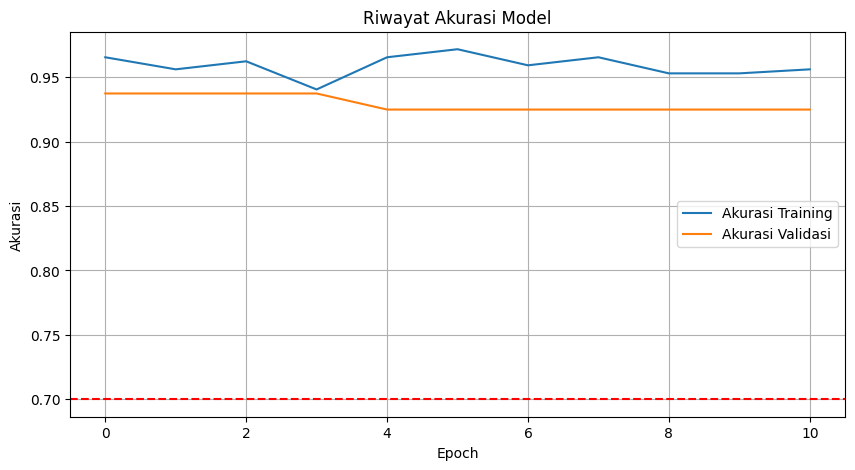

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Kita atur epoch ke 50
history = model.fit(X_train, y_train,
                    epochs=55,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping], # Menambahkan callback di sini
                    verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nAkurasi Akhir pada Data Validasi: {accuracy*100:.2f}%")

# Plot akan menunjukkan di mana training berhenti
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Riwayat Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.axhline(y=0.7, color='r', linestyle='--', label='Target 70%')
plt.show()

Berdasarkan dari grafik diatas menunjukkan bahwa model Sequential yang saya bangun dan latih terdiri dari beberapa lapisan yang ditumpuk secara berurutan: dimulai dengan lapisan tersembunyi (dense) yang memiliki 64 neuron, diikuti lapisan kedua dengan 32 neuron, dan diakhiri dengan lapisan output (dense_2) yang memiliki 3 neuron, yang jumlahnya sesuai dengan tiga kategori target (Rendah, Sedang, Tinggi). Di antara lapisan-lapisan tersebut, terdapat lapisan Dropout yang berfungsi untuk mencegah model menjadi menghafal pada data latih (overfitting).